# Mental Health Data Project Using Machine Learning

In [99]:
import pandas as pd
df= pd.read_csv(r"C:\Users\sandi\Downloads\Mental Health dataset based on DASS-21\Mental Health dataset based on DASS-21\DASS 1.csv")
df.head()

,Age,Gender,Marital Status,Education Status,Occupational Status,Sleeping Problem,Q3_1_S1,Q3_2_S2,Q3_3_S3,Q3_4_S4,...,Anxiety_Level,Q3_15_D1,Q3_16_D2,Q3_17_D3,Q3_18_D4,Q3_19_D5,Q3_20_D6,Q3_21_D7,Depression_Score,Depression_Level
0,21,2,0,4,4,1,3,3,3,3,...,3,0,3,3,2,3,3,3,17,5
1,18,2,0,4,4,1,3,3,3,3,...,2,0,2,3,0,0,2,0,7,3
2,40,2,1,2,1,1,3,3,1,2,...,5,2,1,1,2,2,1,2,11,4
3,24,1,0,4,2,0,3,3,1,2,...,5,2,1,1,2,2,1,2,11,4
4,50,1,1,2,2,0,3,3,3,2,...,2,1,0,0,1,2,0,0,4,1


In [100]:
#Checking the data for any null values, datatypes and shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1812 entries, 0 to 1811
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Age                  1812 non-null   int64
 1   Gender               1812 non-null   int64
 2   Marital Status       1812 non-null   int64
 3   Education Status     1812 non-null   int64
 4   Occupational Status  1812 non-null   int64
 5   Sleeping Problem     1812 non-null   int64
 6   Q3_1_S1              1812 non-null   int64
 7   Q3_2_S2              1812 non-null   int64
 8   Q3_3_S3              1812 non-null   int64
 9   Q3_4_S4              1812 non-null   int64
 10  Q3_5_S5              1812 non-null   int64
 11  Q3_6_S6              1812 non-null   int64
 12  Q3_7_S7              1812 non-null   int64
 13  Stress_Score         1812 non-null   int64
 14  Stress_Level         1812 non-null   int64
 15  Q3_8_A1              1812 non-null   int64
 16  Q3_9_A2              181

In [101]:
#Investigating the relationships, importing libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
#checking for correlation
corr= df[['Age','Gender', 'Marital Status', 'Education Status', 'Occupational Status', 'Sleeping Problem', 'Stress_Level']].corr(method= 'spearman')

In [103]:
corr

,Age,Gender,Marital Status,Education Status,Occupational Status,Sleeping Problem,Stress_Level
Age,1.000000,-0.419496,0.701985,-0.571909,-0.389288,0.114118,0.229846
Gender,-0.419496,1.000000,-0.206862,0.119957,-0.121944,0.006645,-0.121736
Marital Status,0.701985,-0.206862,1.000000,-0.494460,-0.570665,0.145565,0.246234
Education Status,-0.571909,0.119957,-0.494460,1.000000,0.414691,-0.121759,-0.292838
Occupational Status,-0.389288,-0.121944,-0.570665,0.414691,1.000000,-0.244555,-0.163100
Sleeping Problem,0.114118,0.006645,0.145565,-0.121759,-0.244555,1.000000,0.138260
Stress_Level,0.229846,-0.121736,0.246234,-0.292838,-0.163100,0.138260,1.000000


In [104]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [105]:
x= df[['Age', 'Gender', 'Marital Status','Education Status', 'Occupational Status', 'Sleeping Problem']]
y= df['Stress_Score']

In [106]:
x_train,x_test,y_train, y_test= train_test_split(x,y, test_size= 0.25)

In [107]:
Model1= LinearRegression()
Model1

LinearRegression()

In [108]:
Model1.fit(x_train, y_train)

LinearRegression()

In [109]:
Predictions1= Model1.predict(x_test)
Ac_score= r2_score(Predictions1, y_test)

In [110]:
Ac_score

-10.208367856298956

## Changing Features for prediction

In [111]:
df.columns

Index(['Age', 'Gender', 'Marital Status', 'Education Status',
       'Occupational Status', 'Sleeping Problem', 'Q3_1_S1', 'Q3_2_S2',
       'Q3_3_S3', 'Q3_4_S4', 'Q3_5_S5', 'Q3_6_S6', 'Q3_7_S7', 'Stress_Score',
       'Stress_Level', 'Q3_8_A1', 'Q3_9_A2', 'Q3_10_A3', 'Q3_11_A4',
       'Q3_12_A5', 'Q3_13_A6', 'Q3_14_A7', 'Anxiety_Score', 'Anxiety_Level',
       'Q3_15_D1', 'Q3_16_D2', 'Q3_17_D3', 'Q3_18_D4', 'Q3_19_D5', 'Q3_20_D6',
       'Q3_21_D7', 'Depression_Score', 'Depression_Level'],
      dtype='object')

In [112]:
newx= df[['Q3_1_S1', 'Q3_2_S2','Q3_3_S3', 'Q3_4_S4', 'Q3_5_S5', 'Q3_6_S6', 'Q3_7_S7']]
newy= df['Stress_Score']

In [113]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(newx, newy, test_size= 0.2)
model= LinearRegression()

In [114]:
model.fit(x_train1, y_train1)
pred= model.predict(x_test1)

In [115]:
scores= r2_score(pred, y_test1)
scores

1.0

In [116]:
#building a model that predicts the stress level now
levelx= df[['Stress_Score']]
levely= df['Stress_Level']

In [117]:
x_train2, x_test2, y_train2, y_test2= train_test_split(levelx, levely, test_size= 0.2)
model1= LinearRegression()
model1.fit(x_train2, y_train2)
pred1= model1.predict(x_test2)
scores1= r2_score(pred1, y_test2)

In [118]:
#checking the accuracy score
scores1

0.8347604663261863

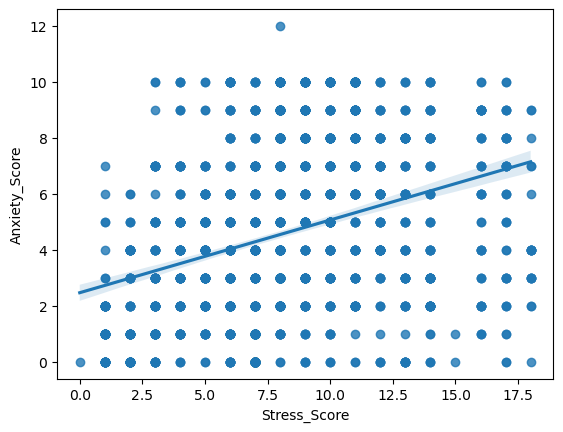

In [119]:
#lets check the relationship between stress score and anxiety score
sns.regplot(x='Stress_Score', y='Anxiety_Score', data = df)
plt.show()

In [120]:
cor= df[['Stress_Score', 'Anxiety_Score']].corr()
cor

,Stress_Score,Anxiety_Score
Stress_Score,1.000000,0.327266
Anxiety_Score,0.327266,1.000000


<Axes: xlabel='Anxiety_Score', ylabel='Depression_Score'>

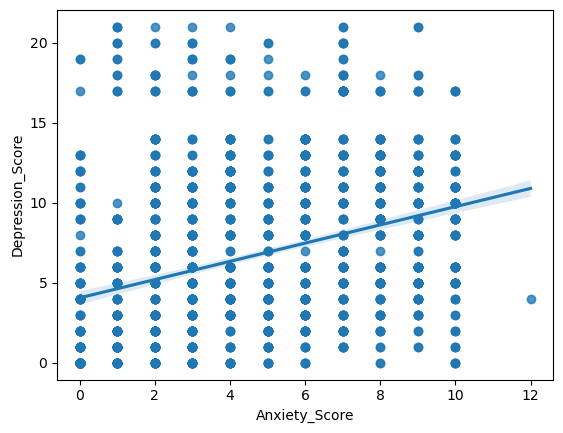

In [121]:
sns.regplot(x= 'Anxiety_Score', y= 'Depression_Score', data= df)

In [122]:
# building a regression model to predict anxiety scores
df.columns

Index(['Age', 'Gender', 'Marital Status', 'Education Status',
       'Occupational Status', 'Sleeping Problem', 'Q3_1_S1', 'Q3_2_S2',
       'Q3_3_S3', 'Q3_4_S4', 'Q3_5_S5', 'Q3_6_S6', 'Q3_7_S7', 'Stress_Score',
       'Stress_Level', 'Q3_8_A1', 'Q3_9_A2', 'Q3_10_A3', 'Q3_11_A4',
       'Q3_12_A5', 'Q3_13_A6', 'Q3_14_A7', 'Anxiety_Score', 'Anxiety_Level',
       'Q3_15_D1', 'Q3_16_D2', 'Q3_17_D3', 'Q3_18_D4', 'Q3_19_D5', 'Q3_20_D6',
       'Q3_21_D7', 'Depression_Score', 'Depression_Level'],
      dtype='object')

In [123]:
#creating a new column called prone to anxiety and depression
import numpy as np
conditions = [
    (df['Anxiety_Score'] <=10),
    (df['Anxiety_Score'] >10)]

choices = [0,1]

df['Prone Anxiety'] = np.select(conditions, choices)

In [124]:
conditions = [
    (df['Depression_Score'] <=14),
    (df['Depression_Score'] >14)]

choices = [0,1]

df['Prone Depression'] = np.select(conditions, choices)

In [125]:
df.head()

,Age,Gender,Marital Status,Education Status,Occupational Status,Sleeping Problem,Q3_1_S1,Q3_2_S2,Q3_3_S3,Q3_4_S4,...,Q3_16_D2,Q3_17_D3,Q3_18_D4,Q3_19_D5,Q3_20_D6,Q3_21_D7,Depression_Score,Depression_Level,Prone Anxiety,Prone Depression
0,21,2,0,4,4,1,3,3,3,3,...,3,3,2,3,3,3,17,5,0,1
1,18,2,0,4,4,1,3,3,3,3,...,2,3,0,0,2,0,7,3,0,0
2,40,2,1,2,1,1,3,3,1,2,...,1,1,2,2,1,2,11,4,0,0
3,24,1,0,4,2,0,3,3,1,2,...,1,1,2,2,1,2,11,4,0,0
4,50,1,1,2,2,0,3,3,3,2,...,0,0,1,2,0,0,4,1,0,0


In [126]:
#creating a regression model for anxiety
ax= df[['Q3_8_A1', 'Q3_9_A2', 'Q3_10_A3', 'Q3_11_A4','Q3_12_A5', 'Q3_13_A6', 'Q3_14_A7']]
ay= df['Anxiety_Score']

#creating a train test split
x_traina, x_testa, y_traina, y_testa = train_test_split(ax, ay, test_size=0.2)
amodel= LinearRegression()
amodel.fit(x_traina, y_traina)
apred= amodel.predict(x_testa)

In [127]:
ascore= r2_score(y_testa,apred)
ascore

1.0

In [128]:
from sklearn.linear_model import LogisticRegression
ax1= df[['Anxiety_Score']]
ay1= df['Prone Anxiety']
x_traina1, x_testa1, y_traina1, y_testa1= train_test_split(ax1, ay1, test_size= 0.2)

In [129]:
amodel2= LogisticRegression(multi_class='multinomial', solver='lbfgs')
amodel2.fit(x_traina1, y_traina1)

C:\Users\sandi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial')

In [130]:
apred1=amodel2.predict(x_testa1)

In [131]:
from sklearn.metrics import accuracy_score
acc= accuracy_score(y_testa1, apred1)
acc

1.0

In [132]:
# building a model for the depression score
df.columns

Index(['Age', 'Gender', 'Marital Status', 'Education Status',
       'Occupational Status', 'Sleeping Problem', 'Q3_1_S1', 'Q3_2_S2',
       'Q3_3_S3', 'Q3_4_S4', 'Q3_5_S5', 'Q3_6_S6', 'Q3_7_S7', 'Stress_Score',
       'Stress_Level', 'Q3_8_A1', 'Q3_9_A2', 'Q3_10_A3', 'Q3_11_A4',
       'Q3_12_A5', 'Q3_13_A6', 'Q3_14_A7', 'Anxiety_Score', 'Anxiety_Level',
       'Q3_15_D1', 'Q3_16_D2', 'Q3_17_D3', 'Q3_18_D4', 'Q3_19_D5', 'Q3_20_D6',
       'Q3_21_D7', 'Depression_Score', 'Depression_Level', 'Prone Anxiety',
       'Prone Depression'],
      dtype='object')

In [133]:
dx=df[['Q3_15_D1', 'Q3_16_D2', 'Q3_17_D3', 'Q3_18_D4', 'Q3_19_D5', 'Q3_20_D6','Q3_21_D7']]
dy= df['Depression_Score']

x_traind,x_testd, y_traind,y_testd= train_test_split(dx,dy,test_size=0.2)
dmodel= LinearRegression()
dmodel.fit(x_traind, y_traind)

LinearRegression()

In [134]:
dpred= dmodel.predict(x_testd)
dscore= r2_score(y_testd, dpred)
dscore

1.0

In [135]:
#logistic model
dx1= df[['Depression_Score']]
dy1= df['Prone Depression']

x_traind1, x_testd1,y_traind1,y_testd1= train_test_split(dx1,dy1, test_size= 0.2)

In [136]:
dmodel1= LogisticRegression()
dmodel1.fit(x_traind1, y_traind1)

LogisticRegression()

In [137]:
dpred1= dmodel1.predict(x_testd1)
acc1= accuracy_score(y_testd1, dpred1)
acc1

1.0

In [138]:
dpred1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

## Saving my models

In [139]:
from joblib import dump,load

In [140]:
dump(model, 'model.joblib')
print('model saved')
dump(model1, 'model1.joblib')
print('model saved')
dump(amodel, 'amodel.joblib')
print('model saved')
dump(amodel2, 'amodel2.joblib')
print('model saved')
dump(dmodel, 'dmodel.joblib')
print('model saved')
dump(dmodel1, 'dmodel1.joblib')
print('model saved')

model saved
model saved
model saved
model saved
model saved
model saved
